# Proyek Klasifikasi jerawat


## Import Semua Packages/Library yang Digunakan

In [ ]:
# Install package tambahan (jika belum ada)
!pip install tensorflow tensorflowjs matplotlib

# Import semua library yang dibutuhkan
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import pathlib
from google.colab import drive


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
google-cloud-bigquery 3.32.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


## Data Preparation

### Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Gantilah path di bawah ini dengan lokasi direktori dataset di GDrive kamu
dataset_path = '/content/drive/MyDrive/dataset_jerawat'

Mounted at /content/drive


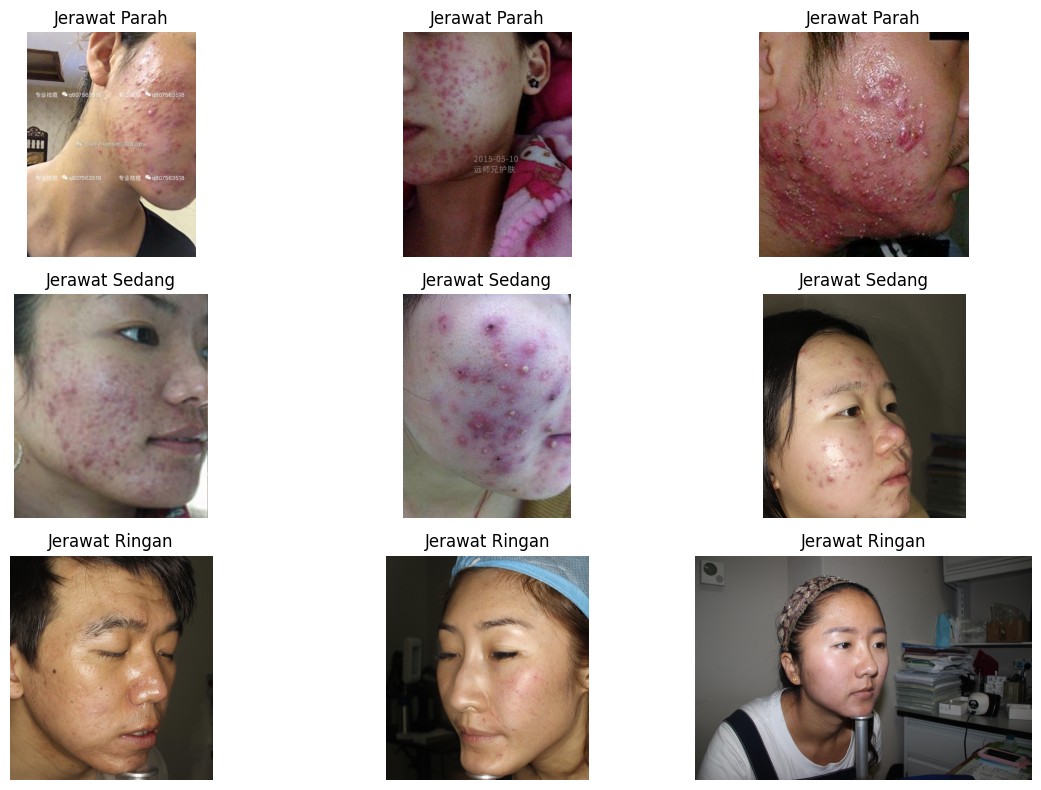

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Ganti dengan path dataset kamu di Google Drive
dataset_dir = '/content/drive/MyDrive/dataset_jerawat'

# Menampilkan beberapa gambar dari masing-masing kelas
kelas = os.listdir(dataset_dir)
plt.figure(figsize=(12, 8))

i = 1
for label in kelas:
    folder = os.path.join(dataset_dir, label)
    images = os.listdir(folder)[:3]  # ambil 3 gambar pertama
    for img_name in images:
        img_path = os.path.join(folder, img_name)
        img = mpimg.imread(img_path)
        plt.subplot(len(kelas), 3, i)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
        i += 1

plt.tight_layout()
plt.show()


In [ ]:
import os

# Ganti dengan path ke folder dataset kamu di Google Drive
dataset_dir = '/content/drive/MyDrive/dataset_jerawat'

# Cek kelas (folder dalam dataset)
kelas = os.listdir(dataset_dir)
print("Daftar Kelas:")
print(kelas)

# Tampilkan jumlah gambar dalam setiap kelas
for k in kelas:
    folder = os.path.join(dataset_dir, k)
    if os.path.isdir(folder):
        jumlah = len(os.listdir(folder))
        print(f"{k}: {jumlah} gambar")


Daftar Kelas:
['Jerawat Parah', 'Jerawat Sedang', 'Jerawat Ringan']
Jerawat Parah: 1234 gambar
Jerawat Sedang: 1303 gambar
Jerawat Ringan: 1145 gambar


### Data Preprocessing

#### Split Dataset

In [ ]:
# Ukuran gambar dan batch size
img_size = (224, 224)
batch_size = 32

# Asumsikan base_dir sama dengan dataset_dir yang sudah ada
base_dir = dataset_dir


In [ ]:
import os
import shutil
import random

# Ganti dengan path ke folder dataset kamu di Google Drive
dataset_dir = '/content/drive/MyDrive/dataset_jerawat'

# Tentukan path baru untuk menyimpan dataset yang sudah di-split
split_base_dir = '/content/drive/MyDrive/dataset_jerawat_split'

# Tentukan rasio split (contoh: 80% train, 10% val, 10% test)
split_ratio = {'train': 0.8, 'val': 0.1, 'test': 0.1}

# Pastikan directory split base ada dan kosongkan jika perlu
if os.path.exists(split_base_dir):
    shutil.rmtree(split_base_dir)
os.makedirs(split_base_dir)

# Dapatkan daftar kelas (folder) dari dataset asli
kelas = os.listdir(dataset_dir)
print("Kelas yang ditemukan:", kelas)

# Buat direktori train, val, dan test untuk setiap kelas
for split_type in split_ratio.keys():
    split_dir = os.path.join(split_base_dir, split_type)
    os.makedirs(split_dir, exist_ok=True) # pastikan direktori dasar split ada
    for k in kelas:
        os.makedirs(os.path.join(split_dir, k), exist_ok=True)

# Iterasi melalui setiap kelas dan lakukan split data
for k in kelas:
    class_dir = os.path.join(dataset_dir, k)
    if os.path.isdir(class_dir):
        images = os.listdir(class_dir)
        random.shuffle(images) # Acak urutan gambar

        total_images = len(images)
        train_count = int(total_images * split_ratio['train'])
        val_count = int(total_images * split_ratio['val'])
        # Test count akan mengambil sisa gambar
        test_count = total_images - train_count - val_count

        train_images = images[:train_count]
        val_images = images[train_count : train_count + val_count]
        test_images = images[train_count + val_count :]

        print(f"\nProcessing class: {k}")
        print(f"Total images: {total_images}")
        print(f"Train images: {len(train_images)}")
        print(f"Validation images: {len(val_images)}")
        print(f"Test images: {len(test_images)}")

        # Pindahkan gambar ke folder yang sesuai
        for img in train_images:
            src = os.path.join(class_dir, img)
            dst = os.path.join(split_base_dir, 'train', k, img)
            shutil.copy(src, dst)

        for img in val_images:
            src = os.path.join(class_dir, img)
            dst = os.path.join(split_base_dir, 'val', k, img)
            shutil.copy(src, dst)

        for img in test_images:
            src = os.path.join(class_dir, img)
            dst = os.path.join(split_base_dir, 'test', k, img)
            shutil.copy(src, dst)

print("\nData berhasil di-split dan disalin!")

# Setelah menjalankan script di atas, ubah path base_dir
# untuk menunjuk ke direktori yang sudah di-split
base_dir = split_base_dir


Kelas yang ditemukan: ['Jerawat Parah', 'Jerawat Sedang', 'Jerawat Ringan']

Processing class: Jerawat Parah
Total images: 1234
Train images: 987
Validation images: 123
Test images: 124

Processing class: Jerawat Sedang
Total images: 1303
Train images: 1042
Validation images: 130
Test images: 131

Processing class: Jerawat Ringan
Total images: 1145
Train images: 916
Validation images: 114
Test images: 115

Data berhasil di-split dan disalin!


In [ ]:
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 2943 images belonging to 3 classes.
Found 366 images belonging to 3 classes.
Found 370 images belonging to 3 classes.


## Modelling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])


model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    25,690,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,082,499 (99.50 MB)

 Trainable params: 26,081,539 (99.49 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint('model_best.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[checkpoint, early_stop, lr_schedule]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5029 - loss: 12.1395
Epoch 1: val_accuracy improved from -inf to 0.33607, saving model to model_best.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.5034 - loss: 12.0835 - val_accuracy: 0.3361 - val_loss: 3.4335 - learning_rate: 0.0010
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6328 - loss: 1.2449
Epoch 2: val_accuracy improved from 0.33607 to 0.43989, saving model to model_best.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.6330 - loss: 1.2418 - val_accuracy: 0.4399 - val_loss: 1.8078 - learning_rate: 0.0010
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7047 - loss: 0.6207
Epoch 3: val_accuracy did not improve from 0.43989
92/92 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.7049 - loss: 0.6208 - val_accuracy: 0.3770 - val_loss: 2.1356 - learning_rate: 0.0010
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7635 - loss: 0.5077
Epoch 4: val_accuracy improved from 0.43989 to 0.48361, saving model to model_best.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.7635 - loss: 0.5079 - val_accuracy: 0.4836 - val_loss: 1.8890 - learning_rate: 0.0010
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7614 - loss: 0.5267
Epoch 5: val_accuracy improved from 0.48361 to 0.66120, saving model to model_best.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.7616 - loss: 0.5263 - val_accuracy: 0.6612 - val_loss: 0.9854 - learning_rate: 0.0010
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7999 - loss: 0.4708
Epoch 6: val_accuracy did not improve from 0.66120
92/92 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.7998 - loss: 0.4709 - val_accuracy: 0.5710 - val_loss: 1.1979 - learning_rate: 0.0010
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7919 - loss: 0.4303
Epoch 7: val_accuracy did not improve from 0.66120
92/92 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.7920 - loss: 0.4303 - val_accuracy: 0.5628 - val_loss: 2.0622 - learning_rate: 0.0010
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8139 - loss: 0.4354
Epoch 8: val_accuracy improved from 0.66120 to 0.66940, saving model to model_best.h5



Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
92/92 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.8140 - loss: 0.4351 - val_accuracy: 0.6694 - val_loss: 1.1737 - learning_rate: 0.0010
Epoch 9/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8581 - loss: 0.3307
Epoch 9: val_accuracy improved from 0.66940 to 0.88798, saving model to model_best.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.8582 - loss: 0.3304 - val_accuracy: 0.8880 - val_loss: 0.2909 - learning_rate: 5.0000e-04
Epoch 10/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9080 - loss: 0.2087
Epoch 10: val_accuracy improved from 0.88798 to 0.93443, saving model to model_best.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.9080 - loss: 0.2088 - val_accuracy: 0.9344 - val_loss: 0.2583 - learning_rate: 5.0000e-04
Epoch 11/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9092 - loss: 0.2112
Epoch 11: val_accuracy did not improve from 0.93443
92/92 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.9092 - loss: 0.2112 - val_accuracy: 0.8825 - val_loss: 0.3349 - learning_rate: 5.0000e-04
Epoch 12/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9355 - loss: 0.1633
Epoch 12: val_accuracy improved from 0.93443 to 0.93716, saving model to model_best.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.9354 - loss: 0.1634 - val_accuracy: 0.9372 - val_loss: 0.3301 - learning_rate: 5.0000e-04
Epoch 13/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9250 - loss: 0.1768
Epoch 13: val_accuracy improved from 0.93716 to 0.95902, saving model to model_best.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.9250 - loss: 0.1767 - val_accuracy: 0.9590 - val_loss: 0.1147 - learning_rate: 5.0000e-04
Epoch 14/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9306 - loss: 0.1772
Epoch 14: val_accuracy did not improve from 0.95902
92/92 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.9307 - loss: 0.1771 - val_accuracy: 0.9016 - val_loss: 0.2119 - learning_rate: 5.0000e-04
Epoch 15/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9398 - loss: 0.1355
Epoch 15: val_accuracy did not improve from 0.95902
92/92 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.9398 - loss: 0.1355 - val_accuracy: 0.9044 - val_loss: 0.3591 - learning_rate: 5.0000e-04
Epoch 16/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9458 - loss: 0.1269
Epoch 16: val_accuracy did not improve from 0.95902

Epoch 16: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
92/92 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.9457 - loss: 0.1270 - val_ac

92/92 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.9512 - loss: 0.0996 - val_accuracy: 0.9672 - val_loss: 0.1322 - learning_rate: 2.5000e-04
Epoch 18/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9543 - loss: 0.1019
Epoch 18: val_accuracy improved from 0.96721 to 0.96995, saving model to model_best.h5


92/92 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.9543 - loss: 0.1018 - val_accuracy: 0.9699 - val_loss: 0.1948 - learning_rate: 2.5000e-04
Epoch 18: early stopping
Restoring model weights from the end of the best epoch: 13.


## Evaluasi dan Visualisasi

In [ ]:
# Evaluasi performa model terhadap data test
test_loss, test_acc = model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9524 - loss: 0.1702

Test Accuracy: 0.9297
Test Loss: 0.2459


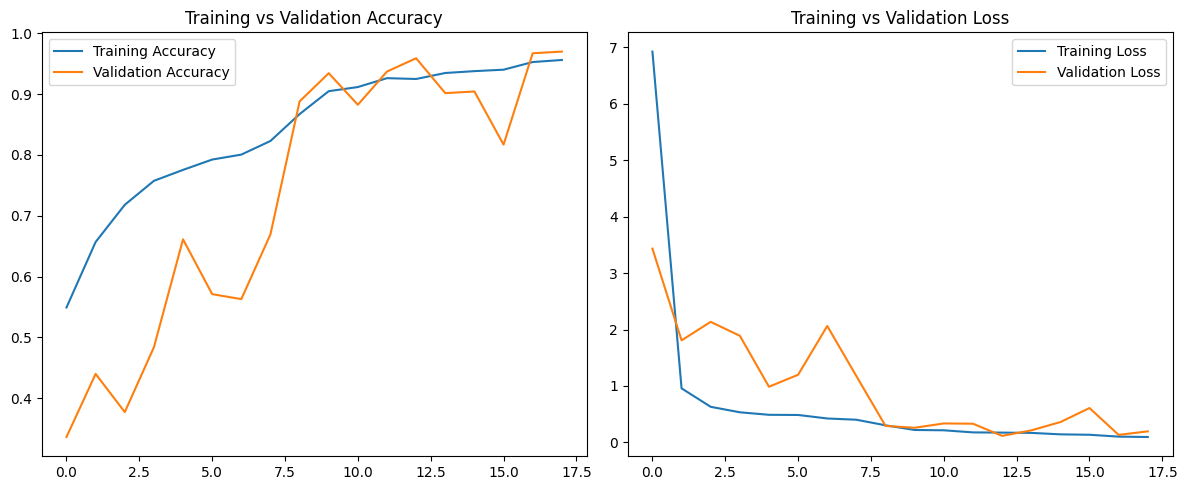

In [ ]:
import matplotlib.pyplot as plt

# Ambil seluruh data history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Buat plot akurasi & loss
plt.figure(figsize=(12, 5))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Konversi Model

In [ ]:
model.save('model_jerawat.h5')


In [ ]:
model.export('model_jerawat_savedmodel')


Saved artifact at 'model_jerawat_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  140008834633360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140008834636432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140008834636816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140008834636624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140008834637200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140008834636240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140008834634704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140008834638160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140008834638544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140008834637008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140008

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model('model_jerawat_savedmodel')
tflite_model = converter.convert()

with open('model_jerawat.tflite', 'wb') as f:
    f.write(tflite_model)


In [ ]:
# !pip install tensorflowjs

!tensorflowjs_converter --input_format=tf_saved_model \
    --output_format=tfjs_graph_model \
    model_jerawat_savedmodel model_jerawat_tfjs

2025-05-27 06:44:19.954407: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748328259.974789   22672 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748328259.980817   22672 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
2025-05-27 06:44:27.390417: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1748328267.390584   22672 gpu_device.cc:2022] Created device /job:localhost/replica:0/task

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
target_folder = '/content/drive/MyDrive/model_jerawat_final'


In [ ]:
import os
import shutil

# Tentukan path target folder di Google Drive
target_folder = '/content/drive/MyDrive/model_jerawat_final'

# 🛠️ PERBAIKAN 1: Cek apakah path sudah ada dan merupakan FILE, bukan folder
if os.path.exists(target_folder) and os.path.isfile(target_folder):
    print(f"⚠️ Path {target_folder} sudah ada dan merupakan file. Menghapus...")
    os.remove(target_folder)  # Hapus file tersebut

# 🛠️ PERBAIKAN 2: Sekarang aman membuat folder target
os.makedirs(target_folder, exist_ok=True)

# 🛠️ PERBAIKAN 3: Buat path untuk folder SavedModel dan TFJS di dalam target folder
savedmodel_target = os.path.join(target_folder, 'model_jerawat_savedmodel')
tfjs_target = os.path.join(target_folder, 'model_jerawat_tfjs')

# 🧹 Jika subfolder sudah ada, bersihkan dulu untuk menghindari FileExistsError
for folder in [savedmodel_target, tfjs_target]:
    if os.path.exists(folder):
        if os.path.isdir(folder):
            shutil.rmtree(folder)  # Hapus folder
        else:
            os.remove(folder)      # Hapus file

# ✅ Salin file model utama (.h5 dan .tflite)
shutil.copy('model_jerawat.h5', target_folder)
shutil.copy('model_best.h5', target_folder)
shutil.copy('model_jerawat.tflite', target_folder)

# ✅ Salin folder SavedModel dan TFJS ke Google Drive
shutil.copytree('model_jerawat_savedmodel', savedmodel_target)
shutil.copytree('model_jerawat_tfjs', tfjs_target)

print("✅ Semua file dan folder model berhasil disalin ke Google Drive!")


✅ Semua file dan folder model berhasil disalin ke Google Drive!
